In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%autoreload 2
%aimport AD_predictor_tools
%aimport AD_comparison_tools
%aimport PlottingTools

In [4]:
! pip install metapredict

     |████████████████████████████████| 476 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 38.5 MB/s eta 0:00:01
  Created wheel for metapredict: filename=metapredict-2.51-py3-none-any.whl size=216771 sha256=834eddefbc30c269b6e01585d3c3ba9eb7b628c673b4e2fe173b1559cb7b2856
  Stored in directory: /Users/sanjanakotha/Library/Caches/pip/wheels/d2/88/3b/0e8ea0c5452a24ed9f6fa74260e931dac2bb04c7e92d0478f2
  Created wheel for alphaPredict: filename=alphaPredict-1.0-py3-none-any.whl size=2301554 sha256=5ea4b2ee9c9c0e852089da05ff4c9ec71bc9d59ea473931e39e7a8cafabe2635
  Stored in directory: /Users/sanjanakotha/Library/Caches/pip/wheels/7b/25/9a/4be22b1e0f6d9156823dde0453082fad6a9909eaffed6b8c74
  Created wheel for getSequence: filename=getSequence-1.4-py3-none-any.whl size=1129096 sha256=3e7dfebbb8b7b3886b72d82e33ad1ec7e2515bba27b5f1c02aea4f20e8618302
  Stored in directory: /Users/sanjanakotha/Library/Cac

In [9]:
import metapredict as meta
import protfasta

In [7]:
stanford = pd.read_excel("../data/Stanford_Supplementary Table 2 Domains from Tiles.xlsx")
stanford

,HGNC symbol,UniProt ID,Domain type,Domain,Start,End,Sequence,Max avg act,Length,Domain overlaps annotation
0,ABRAXAS1,Q6UWZ7,AD,1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,-1.771253,80,0
1,AHR,P35869,AD,1,531,640,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,1.159695,110,0
2,AHR,P35869,AD,2,641,720,MKHMQVNGMFENWNSNQFVPFNCPQQDPQQYNVFTDLHGISQEFPY...,1.159695,80,0
3,AKAP8,O43823,AD,1,1,80,DQGYGGYGAWSAGPANTQGAYGTGVASWQGYENYNYYGAQNTSVTT...,0.989791,80,0
4,AKAP8L,Q9ULX6,AD,1,1,80,SYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYGY...,0.993831,80,1
...,...,...,...,...,...,...,...,...,...,...
369,ZNF532,Q9HCE3,AD,1,1,80,TMGDMKTPDFDDLLAAFDIPDMVDPKAAIESGHDDHESHMKQNAHG...,0.450331,80,0
370,ZNF592,Q92610,AD,1,1,80,GDMKTPDFDDLLAAFDIPDPTSLDAKEAIQTPSEENESPLKPPGIC...,-0.700514,80,0
371,ZNF644,Q9H582,AD,1,901,980,PGENATLSYDQNDGFYFEYYEDTGSNNFLHEIHDPQHLETADASLS...,-1.303710,80,0
372,ZNF687,Q8N1G0,AD,1,1,80,GDMKTPDFDDLLAAFDIPDIDANEAIHSGPEENEGPGGPGKPEPGV...,0.381333,80,0


In [31]:
stanford["header"] = ">sp|" + stanford["UniProt ID"] + "|" \
+ stanford["HGNC symbol"] + "|" + stanford["Start"].astype(str) \
+ "-" + stanford["End"].astype(str)
stanford

,HGNC symbol,UniProt ID,Domain type,Domain,Start,End,Sequence,Max avg act,Length,Domain overlaps annotation,header
0,ABRAXAS1,Q6UWZ7,AD,1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,-1.771253,80,0,>sp|Q6UWZ7|ABRAXAS1|121-200
1,AHR,P35869,AD,1,531,640,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,1.159695,110,0,>sp|P35869|AHR|531-640
2,AHR,P35869,AD,2,641,720,MKHMQVNGMFENWNSNQFVPFNCPQQDPQQYNVFTDLHGISQEFPY...,1.159695,80,0,>sp|P35869|AHR|641-720
3,AKAP8,O43823,AD,1,1,80,DQGYGGYGAWSAGPANTQGAYGTGVASWQGYENYNYYGAQNTSVTT...,0.989791,80,0,>sp|O43823|AKAP8|1-80
4,AKAP8L,Q9ULX6,AD,1,1,80,SYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYGY...,0.993831,80,1,>sp|Q9ULX6|AKAP8L|1-80
...,...,...,...,...,...,...,...,...,...,...,...
369,ZNF532,Q9HCE3,AD,1,1,80,TMGDMKTPDFDDLLAAFDIPDMVDPKAAIESGHDDHESHMKQNAHG...,0.450331,80,0,>sp|Q9HCE3|ZNF532|1-80
370,ZNF592,Q92610,AD,1,1,80,GDMKTPDFDDLLAAFDIPDPTSLDAKEAIQTPSEENESPLKPPGIC...,-0.700514,80,0,>sp|Q92610|ZNF592|1-80
371,ZNF644,Q9H582,AD,1,901,980,PGENATLSYDQNDGFYFEYYEDTGSNNFLHEIHDPQHLETADASLS...,-1.303710,80,0,>sp|Q9H582|ZNF644|901-980
372,ZNF687,Q8N1G0,AD,1,1,80,GDMKTPDFDDLLAAFDIPDIDANEAIHSGPEENEGPGGPGKPEPGV...,0.381333,80,0,>sp|Q8N1G0|ZNF687|1-80


In [32]:
protfasta.write_fasta(stanford[["header", "Sequence"]].values.tolist(), filename = "../data/stanford_ADs.fasta")

In [33]:
metapredict_output = meta.predict_disorder_fasta("../data/stanford_ADs.fasta")
metapredict_output

{'>sp|Q6UWZ7|ABRAXAS1|121-200': [0.8921,
  0.8424,
  0.8191,
  0.7907,
  0.7367,
  0.6923,
  0.696,
  0.6845,
  0.6783,
  0.6681,
  0.64,
  0.609,
  0.5637,
  0.538,
  0.533,
  0.5453,
  0.5547,
  0.5596,
  0.561,
  0.5605,
  0.5733,
  0.598,
  0.6041,
  0.6213,
  0.6086,
  0.6087,
  0.6053,
  0.5972,
  0.5799,
  0.5704,
  0.5896,
  0.5643,
  0.5653,
  0.5503,
  0.5688,
  0.5529,
  0.5699,
  0.5653,
  0.5694,
  0.5784,
  0.5634,
  0.5565,
  0.5412,
  0.5051,
  0.4834,
  0.4935,
  0.4823,
  0.4751,
  0.4765,
  0.488,
  0.506,
  0.5144,
  0.5372,
  0.5369,
  0.5437,
  0.551,
  0.568,
  0.5797,
  0.6063,
  0.6196,
  0.6457,
  0.6753,
  0.6859,
  0.7322,
  0.7637,
  0.794,
  0.7891,
  0.7972,
  0.8062,
  0.811,
  0.8213,
  0.8176,
  0.8199,
  0.8153,
  0.8206,
  0.8108,
  0.8177,
  0.8217,
  0.8052,
  0.7245],
 '>sp|P35869|AHR|531-640': [0.9108,
  0.9144,
  0.8958,
  0.8632,
  0.8532,
  0.8134,
  0.7554,
  0.7026,
  0.6361,
  0.6012,
  0.5677,
  0.5346,
  0.5101,
  0.4974,
  0.4803,
  0.47

In [84]:
domain_boundaries = dict()

for key in metapredict_output.keys():
    seq = meta.predict_disorder_domains_from_external_scores(disorder = metapredict_output[key])
    domain_boundaries[key] = seq.disordered_domain_boundaries

In [54]:
domain_boundaries

{'>sp|Q6UWZ7|ABRAXAS1|121-200': [[0, 80]],
 '>sp|P35869|AHR|531-640': [[0, 110]],
 '>sp|P35869|AHR|641-720': [[0, 80]],
 '>sp|O43823|AKAP8|1-80': [[0, 80]],
 '>sp|Q9ULX6|AKAP8L|1-80': [[0, 80]],
 '>sp|O00213|APBB1|221-330': [[0, 110]],
 '>sp|O95704|APBB3|11-90': [[46, 80]],
 '>sp|O95704|APBB3|31-110': [[0, 80]],
 '>sp|Q8WW27|APOBEC4|21-100': [[57, 80]],
 '>sp|A6NJG6|ARGFX|141-250': [[0, 110]],
 '>sp|A6NJG6|ARGFX|191-314': [[0, 14], [68, 130]],
 '>sp|O00327|ARNTL|541-624': [[0, 90]],
 '>sp|Q8WYA1|ARNTL2|541-635': [[0, 100]],
 '>sp|Q76L83|ASXL2|601-680': [[0, 80]],
 '>sp|Q76L83|ASXL2|631-720': [[0, 90]],
 '>sp|Q9C0F0|ASXL3|1011-1090': [[0, 40]],
 '>sp|Q9C0F0|ASXL3|1031-1110': [[0, 80]],
 '>sp|Q96QE3|ATAD5|1651-1730': [],
 '>sp|P18848|ATF4|1-190': [[0, 190]],
 '>sp|Q9Y2D1|ATF5|1-100': [[0, 100]],
 '>sp|Q9Y2D1|ATF5|41-130': [[0, 52], [77, 90]],
 '>sp|Q9Y2D1|ATF5|91-170': [[0, 80]],
 '>sp|P18850|ATF6|1-90': [[0, 20]],
 '>sp|P18850|ATF6|41-130': [[0, 90]],
 '>sp|Q99941|ATF6B|1-90': [[0, 90]]

In [67]:
domain_df = pd.DataFrame.from_dict(domain_boundaries, orient = "index")
domain_df

,0,1
>sp|Q6UWZ7|ABRAXAS1|121-200,"[0, 80]",None
>sp|P35869|AHR|531-640,"[0, 110]",None
>sp|P35869|AHR|641-720,"[0, 80]",None
>sp|O43823|AKAP8|1-80,"[0, 80]",None
>sp|Q9ULX6|AKAP8L|1-80,"[0, 80]",None
...,...,...
>sp|Q9HCE3|ZNF532|1-80,"[0, 80]",None
>sp|Q92610|ZNF592|1-80,"[0, 80]",None
>sp|Q9H582|ZNF644|901-980,"[0, 80]",None
>sp|Q8N1G0|ZNF687|1-80,"[0, 80]",None


In [68]:
domain_df = domain_df.reset_index()
domain_df

,index,0,1
0,>sp|Q6UWZ7|ABRAXAS1|121-200,"[0, 80]",None
1,>sp|P35869|AHR|531-640,"[0, 110]",None
2,>sp|P35869|AHR|641-720,"[0, 80]",None
3,>sp|O43823|AKAP8|1-80,"[0, 80]",None
4,>sp|Q9ULX6|AKAP8L|1-80,"[0, 80]",None
...,...,...,...
369,>sp|Q9HCE3|ZNF532|1-80,"[0, 80]",None
370,>sp|Q92610|ZNF592|1-80,"[0, 80]",None
371,>sp|Q9H582|ZNF644|901-980,"[0, 80]",None
372,>sp|Q8N1G0|ZNF687|1-80,"[0, 80]",None


In [70]:
coordinates = domain_df["index"].str.split("|").str[-1]
domain_df["uniprotID"] = domain_df["index"].str.split("|").str[1]
domain_df["GeneName"] = domain_df["index"].str.split("|").str[2]
domain_df["Start"] = coordinates.str.split("-").str[0]
domain_df["End"] = coordinates.str.split("-").str[1]
domain_df

,index,0,1,Start,End,uniprotID,GeneName
0,>sp|Q6UWZ7|ABRAXAS1|121-200,"[0, 80]",None,121,200,Q6UWZ7,ABRAXAS1
1,>sp|P35869|AHR|531-640,"[0, 110]",None,531,640,P35869,AHR
2,>sp|P35869|AHR|641-720,"[0, 80]",None,641,720,P35869,AHR
3,>sp|O43823|AKAP8|1-80,"[0, 80]",None,1,80,O43823,AKAP8
4,>sp|Q9ULX6|AKAP8L|1-80,"[0, 80]",None,1,80,Q9ULX6,AKAP8L
...,...,...,...,...,...,...,...
369,>sp|Q9HCE3|ZNF532|1-80,"[0, 80]",None,1,80,Q9HCE3,ZNF532
370,>sp|Q92610|ZNF592|1-80,"[0, 80]",None,1,80,Q92610,ZNF592
371,>sp|Q9H582|ZNF644|901-980,"[0, 80]",None,901,980,Q9H582,ZNF644
372,>sp|Q8N1G0|ZNF687|1-80,"[0, 80]",None,1,80,Q8N1G0,ZNF687


In [81]:
domain_df["domain1_start_unadj"] = domain_df[0].str[0]
domain_df["domain1_end_unadj"] = domain_df[0].str[1]

domain_df["domain2_start_unadj"] = domain_df[1].str[0]
domain_df["domain2_end_unadj"] = domain_df[1].str[1]

#domain_df["domain1_start_unadj"] = domain_df[0].str.split("[").str[0]
domain_df

,index,0,1,Start,End,uniprotID,GeneName,domain1_start_unadj,domain1_end_unadj,domain2_start_unadj,domain2_end_unadj
0,>sp|Q6UWZ7|ABRAXAS1|121-200,"[0, 80]",None,121,200,Q6UWZ7,ABRAXAS1,0.0,80.0,NaN,NaN
1,>sp|P35869|AHR|531-640,"[0, 110]",None,531,640,P35869,AHR,0.0,110.0,NaN,NaN
2,>sp|P35869|AHR|641-720,"[0, 80]",None,641,720,P35869,AHR,0.0,80.0,NaN,NaN
3,>sp|O43823|AKAP8|1-80,"[0, 80]",None,1,80,O43823,AKAP8,0.0,80.0,NaN,NaN
4,>sp|Q9ULX6|AKAP8L|1-80,"[0, 80]",None,1,80,Q9ULX6,AKAP8L,0.0,80.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
369,>sp|Q9HCE3|ZNF532|1-80,"[0, 80]",None,1,80,Q9HCE3,ZNF532,0.0,80.0,NaN,NaN
370,>sp|Q92610|ZNF592|1-80,"[0, 80]",None,1,80,Q92610,ZNF592,0.0,80.0,NaN,NaN
371,>sp|Q9H582|ZNF644|901-980,"[0, 80]",None,901,980,Q9H582,ZNF644,0.0,80.0,NaN,NaN
372,>sp|Q8N1G0|ZNF687|1-80,"[0, 80]",None,1,80,Q8N1G0,ZNF687,0.0,80.0,NaN,NaN


---
Attempt #2: use percent_disorder() function

In [85]:
stanford

,HGNC symbol,UniProt ID,Domain type,Domain,Start,End,Sequence,Max avg act,Length,Domain overlaps annotation,header
0,ABRAXAS1,Q6UWZ7,AD,1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,-1.771253,80,0,>sp|Q6UWZ7|ABRAXAS1|121-200
1,AHR,P35869,AD,1,531,640,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,1.159695,110,0,>sp|P35869|AHR|531-640
2,AHR,P35869,AD,2,641,720,MKHMQVNGMFENWNSNQFVPFNCPQQDPQQYNVFTDLHGISQEFPY...,1.159695,80,0,>sp|P35869|AHR|641-720
3,AKAP8,O43823,AD,1,1,80,DQGYGGYGAWSAGPANTQGAYGTGVASWQGYENYNYYGAQNTSVTT...,0.989791,80,0,>sp|O43823|AKAP8|1-80
4,AKAP8L,Q9ULX6,AD,1,1,80,SYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYGY...,0.993831,80,1,>sp|Q9ULX6|AKAP8L|1-80
...,...,...,...,...,...,...,...,...,...,...,...
369,ZNF532,Q9HCE3,AD,1,1,80,TMGDMKTPDFDDLLAAFDIPDMVDPKAAIESGHDDHESHMKQNAHG...,0.450331,80,0,>sp|Q9HCE3|ZNF532|1-80
370,ZNF592,Q92610,AD,1,1,80,GDMKTPDFDDLLAAFDIPDPTSLDAKEAIQTPSEENESPLKPPGIC...,-0.700514,80,0,>sp|Q92610|ZNF592|1-80
371,ZNF644,Q9H582,AD,1,901,980,PGENATLSYDQNDGFYFEYYEDTGSNNFLHEIHDPQHLETADASLS...,-1.303710,80,0,>sp|Q9H582|ZNF644|901-980
372,ZNF687,Q8N1G0,AD,1,1,80,GDMKTPDFDDLLAAFDIPDIDANEAIHSGPEENEGPGGPGKPEPGV...,0.381333,80,0,>sp|Q8N1G0|ZNF687|1-80


In [87]:
stanford["percent_disorder"] = stanford["Sequence"].apply(meta.percent_disorder)
stanford

,HGNC symbol,UniProt ID,Domain type,Domain,Start,End,Sequence,Max avg act,Length,Domain overlaps annotation,header,percent_disorder
0,ABRAXAS1,Q6UWZ7,AD,1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,-1.771253,80,0,>sp|Q6UWZ7|ABRAXAS1|121-200,92.500
1,AHR,P35869,AD,1,531,640,QDSKNSDLYSIMKNLGIDFEDIRHMQNEKFFRNDFSGEVDFRDIDL...,1.159695,110,0,>sp|P35869|AHR|531-640,77.273
2,AHR,P35869,AD,2,641,720,MKHMQVNGMFENWNSNQFVPFNCPQQDPQQYNVFTDLHGISQEFPY...,1.159695,80,0,>sp|P35869|AHR|641-720,100.000
3,AKAP8,O43823,AD,1,1,80,DQGYGGYGAWSAGPANTQGAYGTGVASWQGYENYNYYGAQNTSVTT...,0.989791,80,0,>sp|O43823|AKAP8|1-80,100.000
4,AKAP8L,Q9ULX6,AD,1,1,80,SYTGFVQGSETTLQSTYSDTSAQPTCDYGYGTWNSGTNRGYEGYGY...,0.993831,80,1,>sp|Q9ULX6|AKAP8L|1-80,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,ZNF532,Q9HCE3,AD,1,1,80,TMGDMKTPDFDDLLAAFDIPDMVDPKAAIESGHDDHESHMKQNAHG...,0.450331,80,0,>sp|Q9HCE3|ZNF532|1-80,100.000
370,ZNF592,Q92610,AD,1,1,80,GDMKTPDFDDLLAAFDIPDPTSLDAKEAIQTPSEENESPLKPPGIC...,-0.700514,80,0,>sp|Q92610|ZNF592|1-80,100.000
371,ZNF644,Q9H582,AD,1,901,980,PGENATLSYDQNDGFYFEYYEDTGSNNFLHEIHDPQHLETADASLS...,-1.303710,80,0,>sp|Q9H582|ZNF644|901-980,81.250
372,ZNF687,Q8N1G0,AD,1,1,80,GDMKTPDFDDLLAAFDIPDIDANEAIHSGPEENEGPGGPGKPEPGV...,0.381333,80,0,>sp|Q8N1G0|ZNF687|1-80,100.000


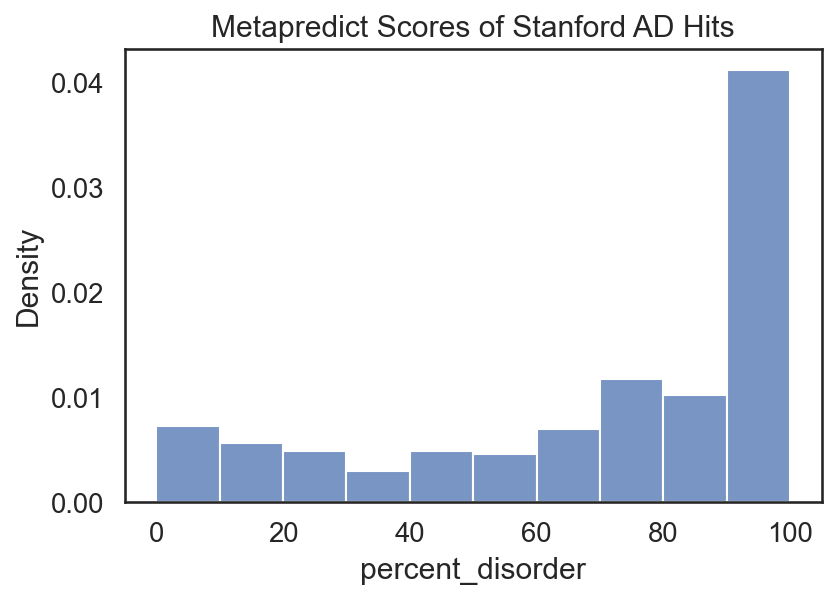

In [98]:
plt.figure(figsize=(6, 4), dpi = 150)
sns.histplot(stanford["percent_disorder"], stat = "density")
plt.title("Metapredict Scores of Stanford AD Hits");

In [90]:
np.mean(stanford["percent_disorder"])

70.88408021390373